In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sudoku_solver import *

%matplotlib inline

# def line_intersect(A1, A2, B1, B2):
#     # https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines-in-python
#     def slope(P1, P2):
#         return(P2[1] - P1[1]) / (P2[0] - P1[0])

#     def y_intercept(P1, slope):
#         return P1[1] - slope * P1[0]
   
#     m1, m2 = slope(A1, A2), slope(B1, B2)
#     if m1 == m2:
#         print ("These lines are parallel!!!")
#         return None
    
#     b1, b2, = y_intercept(A1, m1), y_intercept(B1, m2)
    
#     x = (b2 - b1) / (m1 - m2)
#     y = m1 * x + b1
#     return x,y


# def rho_theta_to_coords(line, image_shape=None):
#     rho, theta = line
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 2000*(-b))
#     y1 = int(y0 + 2000*(a))
#     x2 = int(x0 - 2000*(-b))
#     y2 = int(y0 - 2000*(a))

#     return x1, y1, x2, y2

# def nearest_neighbors(arr, values):
#     res = []
# #     vs = list(np.sort(values))
#     vs = values
#     thresholds = list((vs[i+1]+vs[i])/2 for i in range(len(vs)-1))
# #     thresholds.insert(0, np.min(arr)*(1+np.finfo(type(arr[0])).eps))
#     thresholds.insert(0, np.min(arr)-0.01)

# #     print(np.finfo(type(arr[0])).epsneg, np.min(arr),
# #           np.min(arr)*(1+np.finfo(type(arr[0])).eps),
# #           np.min(arr)<np.min(arr)*(1+np.finfo(type(arr[0])).eps))
#     thresholds.append(np.max(arr))
# #     print(thresholds)
#     for th_i in range(1, len(thresholds)):
# #         print(thresholds[th_i-1], thresholds[th_i])
#         indexes_1 = np.where(arr<=thresholds[th_i])[0]
#         indexes_2 = np.where(arr>thresholds[th_i-1])[0]
#         indexes = list(set(indexes_1).intersection(indexes_2))
#         res.append(indexes)
#     return res

# def classify_lines_by_theta(ls):
#     thetas = np.array(list(line[0][1] for line in ls))
# #     print(len(thetas))
# #     plt.hist(thetas)
#     count, ths = np.histogram(thetas)
# #     print(count)
# #     print( np.argsort(count))
#     th1, th2 = ths[((np.argsort(count))[::-1])[:2]]
# #     print(th1, th2)

#     thetas_1, thetas_2 = nearest_neighbors(thetas, [th1, th2])
    
#     return ls[thetas_1], ls[thetas_2]

# def filter_lines_by_rho(ls, threshold = 25):
#     rhos = np.array(list(line[0][0] for line in ls))
    
#     sorted_indexes = np.argsort(rhos)
#     rhos = rhos[sorted_indexes]
#     sorted_lines = ls[sorted_indexes]
# #     print(len(rhos), rhos)
#     ct = np.array(list(np.array([abs(rhos[i]-rhos[j]) for i in range(len(rhos)-1, j, -1)]) for j in range(len(rhos)-1)))
# #     for i, _ in enumerate(ct):
# #         print(i, _)
#     res = []
#     for i, l in enumerate(ct):
#         if np.min(l)>threshold:
#             res.append(i)
# #         else:
# #             print("delele", i)
#     res.append(len(rhos)-1)
# #     print("res", res)
# #     print("rhos\n",rhos, "\n")
#     classified_lines = nearest_neighbors(rhos, rhos[res])
# #     print("classified_lines\n", classified_lines)
# #     for _ in list(sorted_lines[inds] for inds in classified_lines):
# #         print(_, "end")
#     final_lines = list(np.average(sorted_lines[inds], axis=0) for inds in classified_lines)
# #     print("test")
# #     print(final_lines)
#     return final_lines

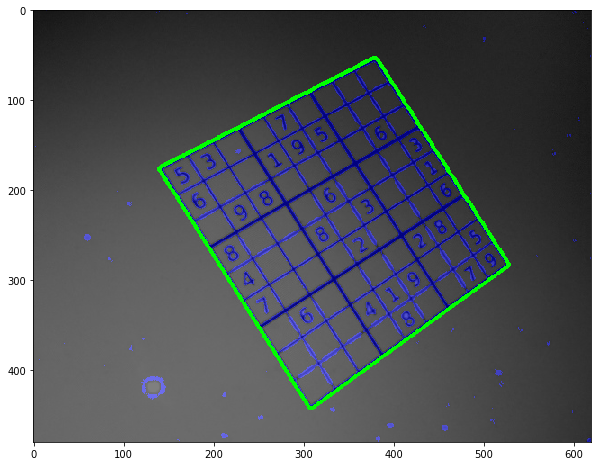

In [12]:
path = "pics/test1.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE )
biggest_contour, th_img = segment_image(img)

display_image = gray_to_rgb(img, mask=[0.5, 0.5, 0.5])
display_image += gray_to_rgb(th_img, mask=[0, 0, 0.5])

cv2.drawContours(display_image, biggest_contour, -1, (0, 255, 0), 3);

plt.figure(figsize=(10,10))
plt.imshow(display_image, cmap="gray")
plt.show()

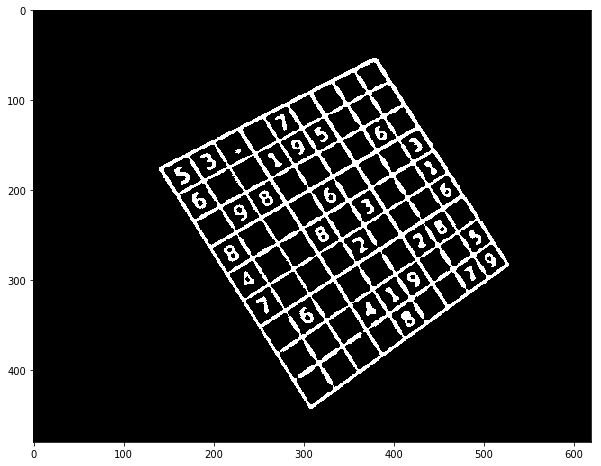

(480, 620)


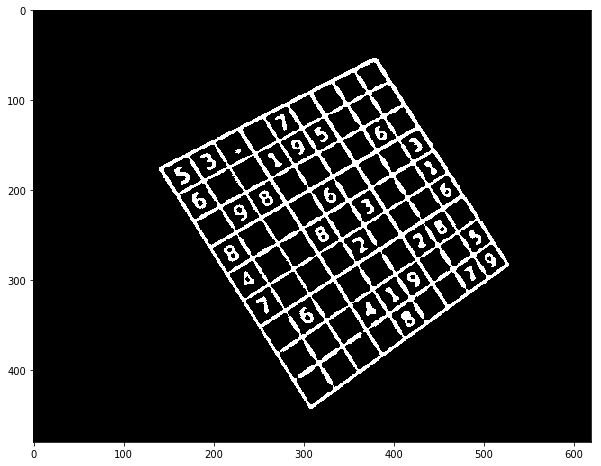

(436, 2)


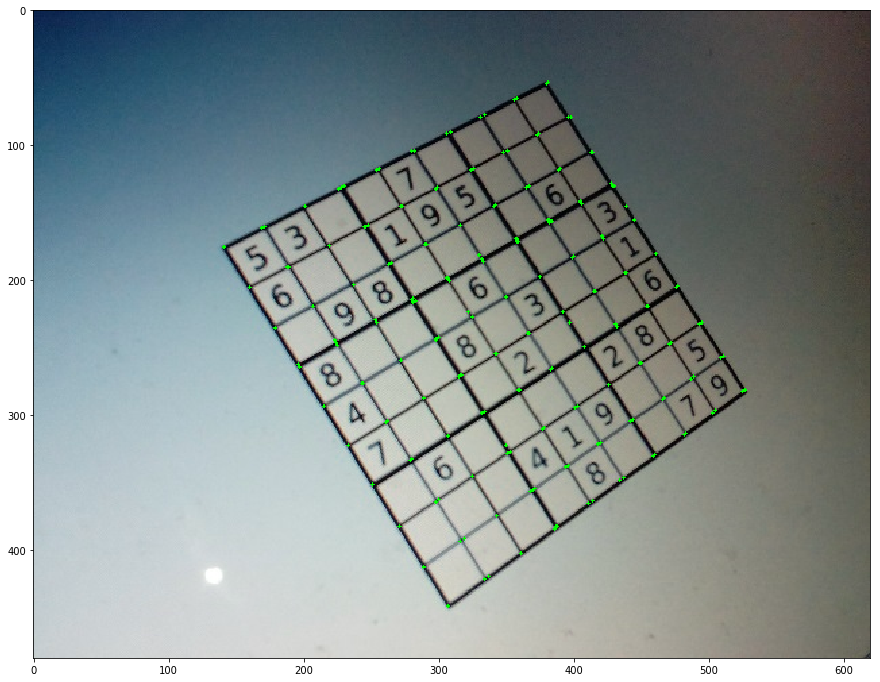

[[ 53. 381.]
 [441. 307.]
 [175. 141.]
 [281. 527.]]


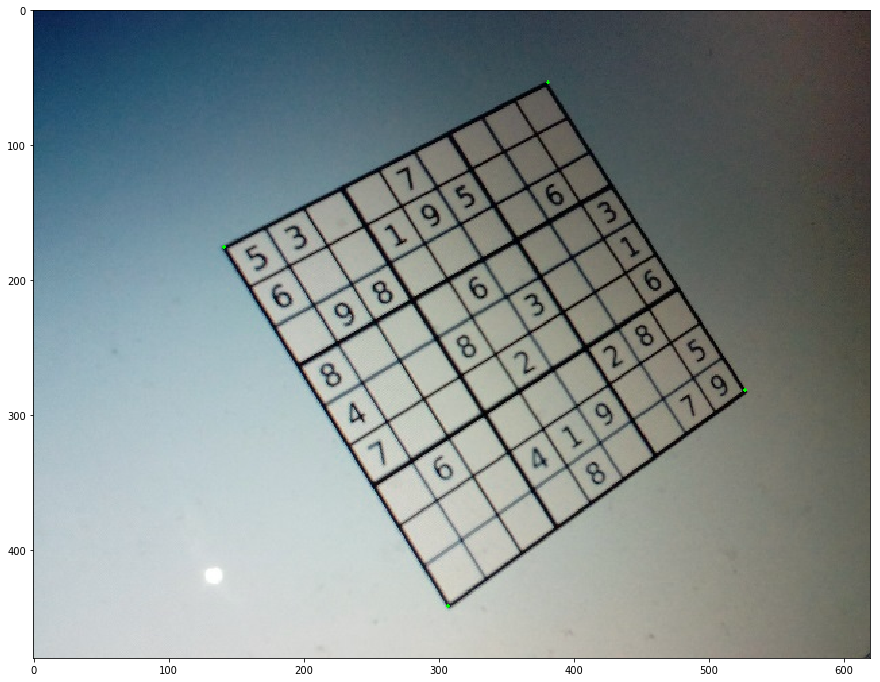

In [24]:
mask = np.zeros(th_img.shape[:2], dtype="uint8")
cv2.drawContours(mask, [biggest_contour], -1, (255), -1)

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE )
segmented_image = np.multiply(mask, th_img)

plt.figure(figsize=(10,10))
plt.imshow(segmented_image, cmap="gray")
plt.show()

# kernel = np.ones((3,3),np.uint8)
# segmented_image =  cv2.Canny(segmented_image,0,50)
# plt.figure(figsize=(10,10))
# plt.imshow(segmented_image, cmap="gray")
# plt.show()

# kernel = np.ones((7,7),np.uint8)
# segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)


print(segmented_image.shape)
plt.figure(figsize=(10,10))
plt.imshow(segmented_image, cmap="gray")
plt.show()

# plt.figure(figsize=(10,10))
# plt.imshow(display_image[segmented_image_indexes, cmap="gray")
# plt.show()

lines = cv2.HoughLines(segmented_image, 1, np.pi/180, 30)[:30]

coord_lines = [rho_theta_to_coords(line[0]) for line in lines]
# print(coord_lines)
# print([(l1[:2], l1[2:]) for l1,  in lines])
# intersection_points = [(l1[:2], l1[2:]) for l1  in coord_lines ]

intersection_points = [line_intersect(l1[:2], l1[2:], l2[:2], l2[2:]) for l1  in coord_lines for l2 in coord_lines]
intersection_points = np.around([p for p in intersection_points if p is not None])
intersection_points = np.array([p for p in intersection_points if cv2.pointPolygonTest(biggest_contour, (p[1], p[0]), False)>=0])

# print([cv2.pointPolygonTest(biggest_contour, tuple(p), False) for p in intersection_points])
print(intersection_points.shape)



rgb_img = cv2.imread(path)
for p in intersection_points:
    if p is not None:
        y1, x1 = np.around(p).astype(int)
        cv2.circle(rgb_img, (x1, y1), 1, (0, 255, 0), -1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

min_x = intersection_points[np.argmin(intersection_points[:, 0])]
max_x = intersection_points[np.argmax(intersection_points[:, 0])]
min_y = intersection_points[np.argmin(intersection_points[:, 1])]
max_y = intersection_points[np.argmax(intersection_points[:, 1])]

final_points = np.array([min_x, max_x, min_y, max_y])

print(final_points)
rgb_img = cv2.imread(path)
for p in final_points:
    if p is not None:
        y1, x1 = np.around(p).astype(int)
        cv2.circle(rgb_img, (x1, y1), 1, (0, 255, 0), -1)
        
plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

# edge_points = np.array(np.array([[x, y] for x in [0, img.shape[0]] for y in [0, img.shape[1]]]))
# print(intersection_points.shape)
# print("edge points",edge_points.shape)
# print(edge_points)


# final_points = intersection_points[np.array([np.argmin(np.linalg.norm(intersection_points-edge_point, axis=1)) for edge_point in edge_points])]




0.9250245 2.417281


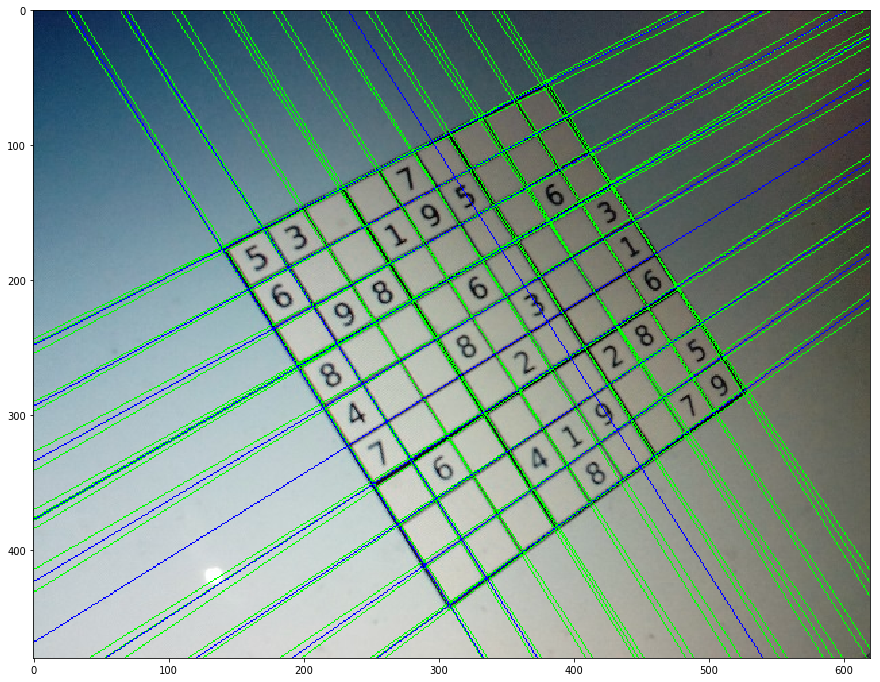

In [86]:
lines = cv2.HoughLines(segmented_image, 1, np.pi/180, 30)[:50]

lines_1, lines_2 = classify_lines_by_theta(lines)
l1 = filter_lines_by_rho(lines_1)
l2 = filter_lines_by_rho(lines_2)

rgb_img = cv2.imread(path)
for line in lines:
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)
for line in l1:
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 0, 255), 1)
for line in l2:
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 0, 255), 1)
plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()